In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
def get_data(balance=True):
    X = []
    Y = []
    first = True
    for line in open('../data/fer2013/fer2013.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X)/ 255.0, np.array(Y)
    if balance:
        X0 , Y0 = X[Y != 1, :], Y[Y !=1]
        X1 = X[Y==1, :]
        X1 = np.repeat(X1,9,axis=0)
        X = np.vstack([X0,X1])
        Y = np.concatenate((Y0, [1]*len(X1)))
    return X,Y

In [3]:
X,Y = get_data()

In [4]:
def draw_sample_image(X,Y):
    labels = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
    X, Y = shuffle(X, Y)
    for i in xrange(20):
        plt.subplot(4,5,i)
        img = X[i].reshape(48,48)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title(labels[Y[i]])
    plt.show()

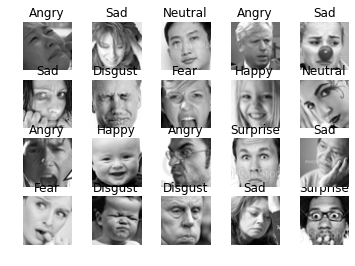

In [5]:
draw_sample_image(X,Y)

In [6]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [7]:
def cost(T, Y):
    return -(T*np.log(Y)).sum()

In [8]:
def y2indicator(Y):
    N = len(Y)
    K = len(set(Y))
    y_ind = np.zeros((N,K))
    for i in xrange(N):
        y_ind[i,Y[i]] = 1
    return y_ind

In [9]:
def error_rate(targets,predictions):
    return np.mean(targets != predictions)

In [10]:
class LogisticModel(object):
    def __init__(self):
        pass
    def train(self, X, Y, learning_rate=10e-8, reg=10e-12, epochs=100, show_fig=True):
        X, Y = shuffle(X, Y)
        X_valid, Y_valid = X[-1000:],Y[-1000:]
        T_valid = y2indicator(Y_valid)
        X, Y = X[:-1000],Y[:-1000]
        N,D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D,K) / np.sqrt(D + K)
        self.b = np.zeros(K)
        costs = []
        best_validation_error = 1
        for epoch in xrange(epochs):
            P_Y = self.forward(X)
            #update the weight 
            self.W -= learning_rate*(X.T.dot(P_Y - T) + reg*self.W)
            self.b -= learning_rate*((P_Y - T).sum(axis=0) + reg*self.b)
            if epoch % 10 == 0:
                P_Y_valid = self.forward(X_valid)
                c = cost(T_valid,P_Y_valid)
                costs.append(c)
                e = error_rate(Y_valid,np.argmax(P_Y_valid,axis=1))
                print "epoch:", epoch, "cost:", c, "error:", e
                if e < best_validation_error:
                    best_validation_error = e
        print "best_validation_error:", best_validation_error
        if show_fig:
            plt.plot(costs)
            plt.show()
    def forward(self,X):
        return softmax(X.dot(self.W) + self.b)
    def predict(self,X):
        P_Y = self.forward(X)
        return np.argmax(P_Y,axis=1)
    def score(self,X,Y):
        prediction = self.predict(X)
        return 1 - error_rate(prediction,Y)

epoch: 0 cost: 1989.82234097 error: 0.866
epoch: 10 cost: 1939.86110445 error: 0.801
epoch: 20 cost: 1936.25076498 error: 0.799
epoch: 30 cost: 1932.76026964 error: 0.799
epoch: 40 cost: 1929.58843779 error: 0.796
epoch: 50 cost: 1926.6847322 error: 0.797
epoch: 60 cost: 1924.00222847 error: 0.799
epoch: 70 cost: 1921.50332553 error: 0.798
epoch: 80 cost: 1919.15804094 error: 0.797
epoch: 90 cost: 1916.94244501 error: 0.795
best_validation_error: 0.795


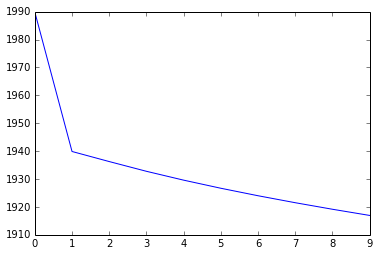

In [11]:
logistic = LogisticModel()
logistic.train(X,Y)